### 2.4.1奖励
价值迭代法受限需要定义价值，生活中价值的确定需要货币的概念，比如钻石换成多少人民币。强化学习中价值使用奖励而非货币。在特定时间$t$给出的奖励$R_t$称为即时奖励(immediate reward)，奖励值需要根据任务自行设定，未来将获得的奖励总和$G_t$被称为累计奖励
$$G_t = R_{t+1}+R_{t+2}+R_{t+3}+\dots$$
结合利率何复利效应，考虑未来的总奖励时，也将折扣率考虑进来，使用累计折扣奖励表示
$$G_t = R_{t+1}+\gamma R_{t+2}+\gamma ^2R_{t+3}+\dots$$
在行为经济学里，人们倾向对未来价值打超过必要的折扣，人类的时间折扣率受到大脑纹状体区域何血清素的影响。
### 2.3.2动作价值何状态价值
![迷宫任务图](./image/迷宫任务图.png)
当智能体（绿色圆圈）到达状态S8时，设定奖励$R_{t+1}=1$，如果智能体在S7且动作=向右，则下一步到达目标且获得奖励$R_{t+1}=1$，在策略$\pi$下，动作价值可以用动作价值函数$Q^\pi(s,a)$表示
$$Q^\pi(s=7,a=1) = 1$$
如果到达S7，但是向上移动到S4，则需要S7→S4→S7→S8才可以
$$Q^\pi(s=7,a=0) = \gamma ^2*1$$
状态价值时在状态$s$遵从策略$\pi$行动时，预计未来获得的总奖励，状态价值函数记为$V^\pi(s)$
例如智能体在S7时，向右移动将达到目标并获得奖励，S4→S7→S8于是
$$V^\pi(s=7)=1$$
$$V^\pi(s=4)=\gamma *1$$
$$V^\pi(s=4)=R_{t+1}+\gamma *V^\pi(s=7)$$
### 2.4.3贝尔曼方程何马尔可夫决策过程
状态价值函数表达式：
$$V^\pi(s)=\max\limits_{a}\mathbb{E}[R_{s,a}+\gamma *V^\pi(s(s,a))]$$
这个表达式也称为贝尔曼方程，表示采用右侧具有最大值的动作$a$时所期望的价值。贝尔曼方程成立的前提条件是学习对象必须是马尔可夫决策过程，下一步的状态$s_{t+1}$，由当前的状态$s_t$和采用的动作$a_t$确定

### 2.5.1用$\epsilon-$贪婪法实现策略
贪婪法：采取Q值最大的动作，在没有正确求得Q值时这种方法，会导致根据随机生成的动作价值的初始值确定动作，可能无法很好地学习，比如S0位置每次向右移动，因此，我们以一定的概率$\epsilon$随机行动，剩下的$1-\epsilon$采取最大Q的行动，随着实验次数增加，$\epsilon$逐渐减小，“探索和利用的权衡”

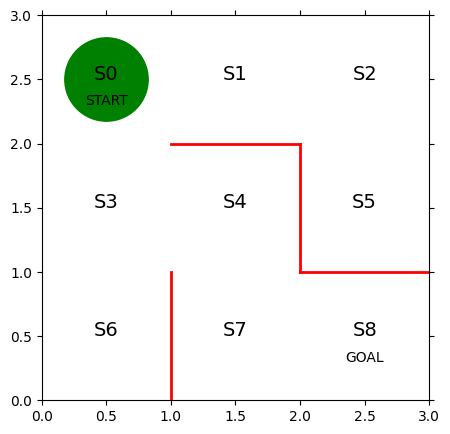

In [1]:
#导入所使用的包
import numpy as np
import pylab as plt
%matplotlib inline

# 迷宫的初始位置

#声明图的大小以及图的变量名
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#画出红色的墙壁
plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

#画出表示状态的文字S0-S8
plt.text(0.5,2.5,'S0',size=14,ha='center')
plt.text(1.5,2.5,'S1',size=14,ha='center')
plt.text(2.5,2.5,'S2',size=14,ha='center')
plt.text(0.5,1.5,'S3',size=14,ha='center')
plt.text(1.5,1.5,'S4',size=14,ha='center')
plt.text(2.5,1.5,'S5',size=14,ha='center')
plt.text(0.5,0.5,'S6',size=14,ha='center')
plt.text(1.5,0.5,'S7',size=14,ha='center')

plt.text(2.5,0.5,'S8',size=14,ha='center')
plt.text(0.5,2.3,'START',ha='center')
plt.text(2.5,0.3,'GOAL',ha='center')

#设定画图的范围
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
                labelbottom='off',right='off',left='off',labelleft='off')

#当前位置S0用绿色圆圈画出
line, = ax.plot([0.5],[2.5],marker="o",color='g',markersize=60)
#设定参数θ的初始值theta_0，用于确定初始方案
 
#行为状态0~7,列用↑、→、↓、←表示移动的方向
theta_0 = np.array([[np.nan,1,1,np.nan],     #S0
                    [np.nan,1,np.nan,1],     #S1
                    [np.nan,np.nan,1,1],     #S2
                    [1,1,1,np.nan],     #S3
                    [np.nan,np.nan,1,1],     #S4
                    [1,np.nan,np.nan,np.nan],#S5
                    [1,np.nan,np.nan,np.nan],#S6
                    [1,1,np.nan,np.nan],     #S7
                    ])     #S8是目标，无策略

In [2]:
[a,b] = theta_0.shape
Q = np.random.rand(a,b) * theta_0
def simple_convert_into_pi_from_theta(theta):

    [m,n] = theta.shape #获取θ矩阵的大小
    pi = np.zeros((m,n))
    for i in range(m):
        pi[i,:]=theta[i,:]/np.nansum(theta[i,:])
    pi = np.nan_to_num(pi) #将nan转为0
    return pi

# 求解初始策略
pi_0 = simple_convert_into_pi_from_theta(theta_0)
print(f'初始策略：\n{pi_0}')

初始策略：
[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [3]:
# 定义求取动作a
def get_action(s,Q,epsilon,pi_0):
    direction = ['up','right','down','left']

    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction,p=pi_0[s,:])
    else:
        next_direction = direction[np.nanargmax(Q[s,:])]
    if next_direction == 'up':
        action = 0
        s_next = s - 3 #向上移动状态数字减3
    elif next_direction == 'right':
        action = 1

    elif next_direction == 'down':
        action = 2

    elif next_direction == 'left':
        action = 3

    return action

# 定义求取动作a以及1步后移动的状态s
def get_s_next(s,a,Q,epsilon,pi_0):
    direction = ['up','right','down','left']
    next_direction = direction[a]

    if next_direction == 'up':
        s_next = s - 3 #向上移动状态数字减3
    elif next_direction == 'right':
        s_next = s + 1 #向→移动状态数字+1
    elif next_direction == 'down':
        s_next = s + 3 #向下移动状态数字+3
    elif next_direction == 'left':
        s_next = s - 1 #向左移动状态数字-1
    return s_next

贝尔曼方程
$$Q(s_t,a_t)=R_{t+1}+\gamma *Q(s_{t+1},a_{t+1})$$
由于学习过程尚未求得正确的动作价值函数，该等式不成立，等式两边的差
$R_{t+1}+\gamma *Q(s_{t+1},a_{t+1})-Q(s_t,a_t)$是TD误差，如果TD误差为0，表示已正确学习到动作价值函数，Q的更新公式为：
$$Q(s_t,a_t)=Q(s_t,a_t)+\eta*(R_{t+1}+\gamma *Q(s_{t+1},a_{t+1})-Q(s_t,a_t))$$

In [4]:
def Sarsa(s,a,r,s_next,a_next,Q,eta,gamma):

    if s_next == 8:
        Q[s,a] = Q[s,a]+eta*(r-Q[s,a])
    else:
        Q[s,a] = Q[s,a] + eta*(r+gamma*Q[s_next,a_next]-Q[s,a])
    return Q

In [5]:
#Sarsa求解迷宫问题的函数

def goal_maze_ret_s_a_Q(Q,epsilon,eta,gamma,pi):
    s = 0#开始地点
    a = a_next = get_action(s,Q,epsilon,pi)
    s_a_history = [[0,np.nan]] #记录智能体移动列表

    while(1):
        a = a_next
        s_a_history[-1][1] = a #带入当前状态，最后一个状态的动作
        s_next = get_s_next(s,a,Q,epsilon,pi)

        s_a_history.append([s_next,np.nan])

        if s_next == 8:
            r=1
            a_next = np.nan
        else:
            r=0
            a_next = get_action(s_next,Q,epsilon,pi)

        Q = Sarsa(s,a,r,s_next,a_next,Q,eta,gamma)

        if s_next == 8:
            break
        else:
            s = s_next
    return [s_a_history,Q]



eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q,axis=1)
is_continue = True
episode = 1
while is_continue:
    print(f'当前回合：{episode}')
    epsilon /=2
    [s_a_history,Q] = goal_maze_ret_s_a_Q(Q,epsilon,eta,gamma,pi_0)

    #状态价值的变化
    new_v = np.nanmax(Q,axis = 1)
    print(np.sum(np.abs(new_v-v)))
    episode += 1
    if episode > 100:
        break

当前回合：1
1.609078820856937
当前回合：2
2.3162692595718193
当前回合：3
2.397891468888801
当前回合：4
2.8214616081207984
当前回合：5
2.8128378574852464
当前回合：6
2.7937803291428045
当前回合：7
2.7736304576191806
当前回合：8
2.752664230144453
当前回合：9
2.749597017845434
当前回合：10
2.774513526637385
当前回合：11
2.795975111445992
当前回合：12
2.8143989444043354
当前回合：13
2.830152253102122
当前回合：14
2.8435585961201033
当前回合：15
2.8549033018271968
当前回合：16
2.8644381866641186
当前回合：17
2.8723856527443807
当前回合：18
2.878942250513669
当前回合：19
2.884281780103075
当前回合：20
2.8885579946147355
当前回合：21
2.891906959652183
当前回合：22
2.894449115746603
当前回合：23
2.8962910837569122
当前回合：24
2.897527247683243
当前回合：25
2.898241144498186
当前回合：26
2.898506686454531
当前回合：27
2.898389237774362
当前回合：28
2.8979465645782296
当前回合：29
2.8972296743021877
当前回合：30
2.896283558612713
当前回合：31
2.8951478519113034
当前回合：32
2.8938574158761194
当前回合：33
2.892442859077911
当前回合：34
2.89093099949791
当前回合：35
2.8893452767373966
当前回合：36
2.8877061198174614
当前回合：37
2.8860312757018107
当前回合：38
2.8843361030171386
当前

In [6]:
#智能体的移动可视化
from matplotlib import animation
from IPython.display import HTML

def init():
    '''初始化背景图像'''
    line.set_data([],[])
    return (line,)

def animate(i):
    '''每一帧画面内容'''
    state = s_a_history[i][0]  #画出当前位置
    x = (state % 3) + 0.5     #x的坐标
    y = 2.5 - int(state/3)
    line.set_data(x,y)
    return (line,)

#初始化函数和绘图函数生成动画
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=len(s_a_history),
                               interval = 200,repeat=False)
HTML(anim.to_jshtml())

C:\Users\xulon\AppData\Local\Temp\ipykernel_7544\4036831212.py:15: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x,y)
